# Смена директории

In [1]:
%cd ..

/Users/uzumnasiya/HSE/Year_Project


# Импорт библиотек

In [2]:
import logging
import warnings


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from utils.plot_utils import time_ranges_plot
from utils.eda_utils import get_vars_statistics
from utils.style_utils import print_multiple_html, k_formatter
from utils.psi import StabilityIndexCalculator

In [3]:
logging.getLogger().setLevel(logging.WARNING)
warnings.filterwarnings('ignore')
sns.set_palette('bright')


pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
%load_ext autoreload
%autoreload 2
%aimport utils.plot_utils
%aimport utils.eda_utils
%aimport utils.style_utils
%aimport utils.psi

# Загрузка данных

**💳 Transaction:** \
Основные данные о финансовых транзакциях

**🔐 Identity:** \
Идентификационная и сетевая информация

**Структура:** \
Данные разделены на train и test выборки

In [5]:
# Train данные
train_transaction = pd.read_csv(r'./data/raw/train_transaction.csv')
train_identity = pd.read_csv(r'./data/raw/train_identity.csv')

# Test данные
test_transaction = pd.read_csv(r'./data/raw/test_transaction.csv')
test_identity = pd.read_csv(r'./data/raw/test_identity.csv')


# Просмотр данных
train_transaction.head(4)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,NaN,13.00,NaN,NaN,NaN,NaN,NaN,NaN,13.00,13.00,NaN,NaN,NaN,0.00,T,T,T,M2,...,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,M0,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,315.00,NaN,NaN,NaN,315.00,T,T,T,M0,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,NaN,NaN,NaN,NaN,84.00,NaN,NaN,NaN,NaN,111.00,NaN,NaN,NaN,M0,...,1.00,1.00,1.00,1.00,38.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,50.00,1758.00,925.00,0.00,354.00,0.00,135.00,0.00,0.00,0.00,50.00,1404.00,790.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Объединение данных
Формируем единый dataframe

In [6]:
# Соединяем фичи и информацию об id
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [7]:
# Проставляем метки выборок
train_data['competition_sample_type'] = 'TRAIN'
test_data['competition_sample_type'] = 'TEST'

# Конкатенация данных
data = pd.concat([train_data, test_data], ignore_index=True)

# Проверяем на наличие дубликатов
assert len(data) == len(train_data) + len(test_data)
assert len(data['TransactionID'].unique()) == len(data)

## Корректировки

In [8]:
# Добавялем конфиги
TARGET = 'target'
DATE_MONTH = 'date_month'
DATE_QUARTAL = 'date_quartal'
RANDOM_STATE = 42

DEV_MASK = (data['competition_sample_type'] == 'TRAIN')

In [9]:
# Переименовываем целевую переменную
data.rename(columns={'isFraud': 'target'}, inplace=True)

In [10]:
# Формируем столбец с читаемой датой
base_date = pd.to_datetime('2020-01-01 00:00:00')
data['TransactionDT_date'] = base_date + pd.to_timedelta(data['TransactionDT'], unit='s') 

In [11]:
data['date_month'] = data['TransactionDT_date'].dt.to_period('M')
data['date_quartal'] = data['TransactionDT_date'].dt.to_period('Q')

# Добавление временных фичей

In [12]:
# Базовые временные компоненты (DeepSeek)
data['year'] = data['TransactionDT_date'].dt.year
data['month'] = data['TransactionDT_date'].dt.month
data['day'] = data['TransactionDT_date'].dt.day
data['hour'] = data['TransactionDT_date'].dt.hour
data['minute'] = data['TransactionDT_date'].dt.minute
data['second'] = data['TransactionDT_date'].dt.second
data['microsecond'] = data['TransactionDT_date'].dt.microsecond

# День недели и другие временные характеристики
data['dayofweek'] = data['TransactionDT_date'].dt.dayofweek
data['weekofyear'] = data['TransactionDT_date'].dt.isocalendar().week
data['quarter'] = data['TransactionDT_date'].dt.quarter
data['is_weekend'] = (data['TransactionDT_date'].dt.dayofweek >= 5).astype(int)

In [13]:
# Циклические фичи для времени (чтобы модель понимала цикличность) (DeepSeek)
data['hour_sin'] = np.sin(2 * np.pi * data['hour']/24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour']/24)
data['dayofweek_sin'] = np.sin(2 * np.pi * data['dayofweek']/7)
data['dayofweek_cos'] = np.cos(2 * np.pi * data['dayofweek']/7)
data['month_sin'] = np.sin(2 * np.pi * data['month']/12)
data['month_cos'] = np.cos(2 * np.pi * data['month']/12)

# Разделение на подвыборки

In [14]:
data[DEV_MASK][DATE_MONTH].value_counts().sort_index()

date_month
2020-01    134339
2020-02     86467
2020-03     95121
2020-04     98615
2020-05     86672
2020-06     86572
2020-07      2754
Freq: M, Name: count, dtype: int64

In [15]:
data["sample_type"] = None
date = "2020-06"

data.loc[(DEV_MASK) & (data[DATE_MONTH] >= date), "sample_type"] = "OOT"


train, test = train_test_split(
    data.loc[(DEV_MASK) & (data[DATE_MONTH] < date)],
    test_size=0.3,
    random_state=RANDOM_STATE,
    shuffle=True,
)

data.loc[train.index, 'sample_type'] = 'TRAIN'
data.loc[test.index, 'sample_type'] = 'TEST'

In [16]:
data_splits = (
    data.groupby("sample_type")
    .agg(
        obs_count=("sample_type", "count"),
        period=(DATE_MONTH, lambda x: f"[{x.min()} - {x.max()}]"),
        target_count=(TARGET, "sum"),
        rate=(TARGET, lambda x: x.sum() / len(x))
    )
    .sort_index(ascending=False)
)

data_splits.style.format(k_formatter(precision=1), subset=['obs_count', 'target_count'])

,obs_count,period,target_count,rate
sample_type,,,,
TRAIN,350.8k,[2020-01 - 2020-05],12.2k,0.034676
TEST,150.4k,[2020-01 - 2020-05],5.4k,0.035800
OOT,89.3k,[2020-06 - 2020-07],3.1k,0.034861


In [17]:
TRAIN_MASK = (data['sample_type'] == 'TRAIN')
TEST_MASK = (data['sample_type'] == 'TEST')
OOT_MASK = (data['sample_type'] == 'OOT')

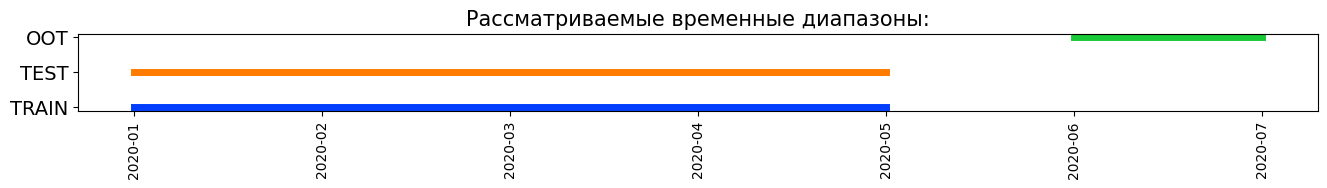

In [18]:
time_ranges_plot(
    datas_dict={
        "TRAIN": data.loc[TRAIN_MASK][[DATE_MONTH]],
        "TEST": data.loc[TEST_MASK][[DATE_MONTH]],
        "OOT": data.loc[OOT_MASK][[DATE_MONTH]],
    },
    date_column=DATE_MONTH,
)

Text(0.5, 1.0, 'Распределение целевой по месяцам')

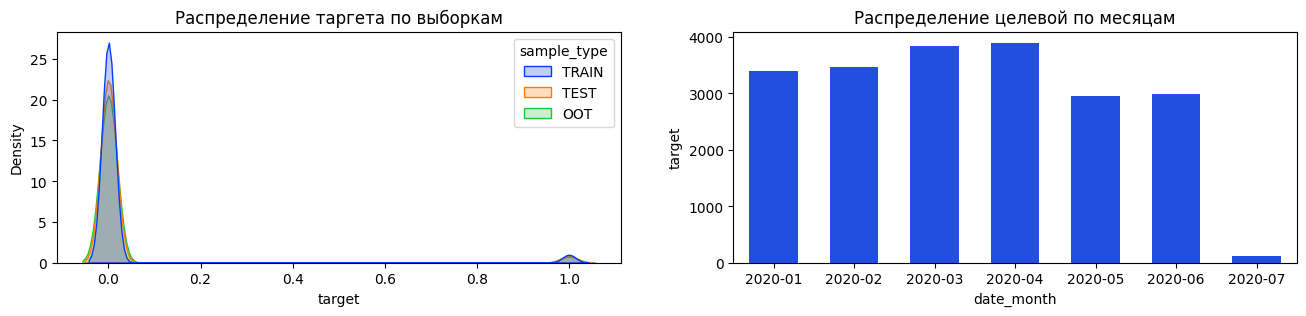

In [19]:
# Графики распределения таргета по выборкам
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

ax = axes[0]
sns.kdeplot(data.loc[DEV_MASK], x=TARGET, hue='sample_type', ax=ax, fill=True, common_norm=False)
ax.set_title('Распределение таргета по выборкам')

ax = axes[1]
temp = data.loc[DEV_MASK].groupby(DATE_MONTH)[TARGET].sum().reset_index()
sns.barplot(temp, x=DATE_MONTH, y=TARGET, ax=ax, width=0.6)
ax.set_title('Распределение целевой по месяцам')

# Первичный отбор переменных

## Выделяем переменные

In [20]:
def exclude_features(columns):
    keywords = ['id', 'dt', 'date', 'time', 'sample_type', 'target', 'date_month', 'date_quartal']
    return [col for col in columns if not any(keyword in col.lower() for keyword in keywords)]

In [21]:
# Выборка признаков
FEATURES = exclude_features(data.columns)
CAT_FEATURES = list(set(FEATURES) & set(data.select_dtypes(include=["object", "category"]).columns))        

In [22]:
print_multiple_html(
    ('Кол-во переменных: ', len(FEATURES)),
    ('Кол-во категориальных переменных: ', len(CAT_FEATURES))
)

## Подсчет статистик

In [23]:
vars_statistics = get_vars_statistics(data.loc[DEV_MASK], FEATURES)

Обработано признаков:   0%|          | 0/410 [00:00<?, ?it/s]

In [24]:
vars_statistics['valid_flag'] = 1
vars_statistics['drop_reason'] = np.nan
vars_statistics.head(4)

,attribute,moda,count_distinct,count_value_moda,count_nan,type,count,unique,top,freq,mean,std,min,1%,50% (median),99%,max,valid_flag,drop_reason
0,TransactionAmt,NaN,20902,NaN,0,float64,590540.00,NaN,NaN,NaN,135.03,239.16,0.25,9.24,68.77,1104.00,31937.39,1,NaN
1,ProductCD,W,5,439670.00,0,object,590540,5,W,439670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,card1,NaN,13553,NaN,0,int64,590540.00,NaN,NaN,NaN,9898.73,4901.17,1000.00,1338.00,9678.00,18238.00,18396.00,1,NaN
3,card2,NaN,501,NaN,8933,float64,581607.00,NaN,NaN,NaN,362.56,157.79,100.00,100.00,361.00,583.00,600.00,1,NaN


### Пустые столбцы

In [25]:
# Все значения пустые
mask = (vars_statistics['count_nan'] == data.loc[DEV_MASK].shape[0])
bad_cols = vars_statistics.loc[mask]['attribute'].values

In [26]:
# Размечаем 
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'valid_flag'] = 0
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'drop_reason'] = 'Все значения пустые'

In [27]:
print_multiple_html(
    ('Кол-во таких переменных: ', len(bad_cols)),
)

### Столбцы принимают единственное значение

In [28]:
mask = (vars_statistics['count_distinct'] == 1)
bad_cols = vars_statistics.loc[mask]['attribute'].values

In [29]:
# Размечаем 
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'valid_flag'] = 0
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'drop_reason'] = 'Принимает единственное значение'

In [30]:
print_multiple_html(
    ('Кол-во таких переменных: ', len(bad_cols)),
)

### Столбцы принимают много уникальных значений 
Подозрение на ID

In [31]:
mask = (vars_statistics['count_distinct'] == data.loc[DEV_MASK].shape[0])
bad_cols = vars_statistics.loc[mask]['attribute'].values

In [32]:
print_multiple_html(
    ('Кол-во таких переменных: ', len(bad_cols)),
)

### 1-ый перцентиль равен 99-му

In [33]:
mask = (vars_statistics['1%'] == vars_statistics['99%'])
bad_cols = vars_statistics.loc[mask]['attribute'].values

In [34]:
# Размечаем 
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'valid_flag'] = 0
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'drop_reason'] = 'Первый перцентиль равен 99-му'

In [35]:
print_multiple_html(
    ('Кол-во таких переменных: ', len(bad_cols)),
)

## PSI
Expected - данные Train; \
Observed - вся наблюдаемая выборка по месяцам.

In [36]:
psi_calc = StabilityIndexCalculator(min_bin_coeff=0.2, min_bin_size_cat=0.01)

psi_res, psi_bins = psi_calc.calculate(
    data.loc[DEV_MASK],     # данные
    var_names=FEATURES,     # какие столбцы считаем
    group_col=DATE_MONTH,   # столбец определяющий периоды
    # initial_val=pd.Period('2023Q3'), # с каким периодом сравниваем остальные, по умолчанию первый
    fit_mask=TRAIN_MASK,    # альтернатива initial_val
    n_bins=10,              # Количество квантилей|бинов
    exclude_miss=False,     # исключить ли пустые значения из расчета стабильности
    exclude_out_int=True,   # Исключить сильные аутлаеры
    bin_edge_std=(1, 1),    # Расширяем мин/макс бины на N std бинов.
    return_bin_counts=True,  # возвращаем дополнительное инфо по бинам
    # variable_bins=variable_bins,
    # verbose=False,
)

In [37]:
psi_result = psi_calc.make_wide_table(psi_res)
bad_cols = psi_result.loc[(psi_result > 0.3).any(axis=1)].index.values

psi_result.head(5).style.format('{:.1%}').background_gradient(cmap='Greys')

date_month,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
TransactionAmt,3.4%,0.8%,0.5%,0.4%,0.6%,0.3%,2.3%
ProductCD,21.3%,4.5%,5.1%,7.0%,5.3%,4.5%,4.9%
card1,0.1%,0.1%,0.0%,0.1%,0.0%,0.3%,0.9%
card2,1.2%,0.3%,0.6%,0.8%,0.6%,0.7%,2.1%
card3,0.8%,1.3%,1.1%,0.8%,0.9%,1.2%,2.2%


In [38]:
# Размечаем 
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'valid_flag'] = 0
vars_statistics.loc[(vars_statistics['attribute'].isin(bad_cols)), 'drop_reason'] = 'Высокий PSI'

In [39]:
print_multiple_html(
    ('Кол-во таких переменных: ', len(bad_cols)),
)

## Итого невалидных

In [40]:
pd.DataFrame(vars_statistics['drop_reason'].value_counts().reset_index())

,drop_reason,count
0,Первый перцентиль равен 99-му,29
1,Высокий PSI,10


# Сохраняем


In [41]:
# Статистики
path = r'./docs/valid_features.xlsx'
vars_statistics.to_excel(path, index=False)

# Выборку
path = r'./data/processed/data.pqt'
data.to_parquet(path)